# COVID mortality rates per country

This is a naive analysis of the published  mortality rates for the COVID 19 pandemic.

- pull the data from a csv on github
- turn it into a Pandas DataFrame
- do some filtering and a couple of plots

I believe that **everyone** should be able to do this.
Doing basic data analysis should be  like  what reading and writing
was at the beginning of the 20th century - a basic skill 
taught to every child at school.

The data is published [here](https://github.com/CSSEGISandData/COVID-19)

**2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE**

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). 




In [78]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the latest time series and save to disk

In [88]:
root_dir = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
fn = 'time_series_covid19_%s_global.csv'

for ss in ['deaths','confirmed']:
    r = requests.get(root_dir + fn%ss, allow_redirects=True)
    open('covid_%s.csv'%ss, 'wb').write(r.content)



# Parse them a DataFrames

In [89]:
df = pd.read_csv('covid_deaths.csv')
dfc = pd.read_csv('covid_confirmed.csv')

In [91]:
dfc[140:150]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
140,NaN,Jordan,31.2400,36.5100,0,0,0,0,0,0,...,52,69,85,85,112,127,154,172,212,235
141,NaN,Kazakhstan,48.0196,66.9237,0,0,0,0,0,0,...,35,44,49,53,60,62,72,81,111,150
142,NaN,Kenya,-0.0236,37.9062,0,0,0,0,0,0,...,3,7,7,7,15,16,25,28,31,31
143,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,...,8413,8565,8652,8799,8961,8961,9037,9137,9241,9332
144,NaN,Kuwait,29.5000,47.7500,0,0,0,0,0,0,...,142,148,159,176,188,189,191,195,208,225
145,NaN,Kyrgyzstan,41.2044,74.7661,0,0,0,0,0,0,...,3,3,6,14,14,16,42,44,44,58
146,NaN,Latvia,56.8796,24.6032,0,0,0,0,0,0,...,71,86,111,124,139,180,197,221,244,280
147,NaN,Lebanon,33.8547,35.8623,0,0,0,0,0,0,...,133,157,163,187,248,267,318,333,368,391
148,NaN,Liberia,6.4281,-9.4295,0,0,0,0,0,0,...,2,2,2,3,3,3,3,3,3,3
149,NaN,Liechtenstein,47.1400,9.5500,0,0,0,0,0,0,...,28,28,28,37,37,51,51,51,56,56


In [10]:
df[df["Country/Region"] == 'South Korea']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20


# Foyers

These are the hotspots for the pandemic
- I chose 300 because I can catch Germany like that

In [38]:
foyers = df[df[df.columns[-1]] > 300]
foyers

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
23,NaN,Belgium,50.8333,4.0000,0,0,0,0,0,0,...,21,37,67,75,88,122,178,220,289,353
62,Hubei,China,30.9756,112.2707,17,17,24,40,52,76,...,3130,3133,3139,3153,3153,3160,3163,3169,3174,3177
116,NaN,France,46.2276,2.2137,0,0,0,0,0,0,...,243,450,562,674,860,1100,1331,1696,1995,2314
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,0,...,44,67,84,94,123,157,206,267,342,433
133,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,1284,1433,1556,1685,1812,1934,2077,2234,2378,2517
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,3405,4032,4825,5476,6077,6820,7503,8215,9134,10023
169,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,76,106,136,179,213,276,356,434,546,639
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,830,1043,1375,1772,2311,2808,3647,4365,5138,5982
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,137,177,233,281,335,422,465,578,759,1019
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,200,244,307,417,557,706,942,1209,1581,2026


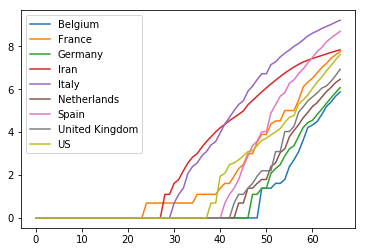

In [31]:
fig, ax = plt.subplots()
for x in foyers.index:
    if df.iloc[x]["Country/Region"] in ['China']: continue
    Y = np.log( df.iloc[x].values[4:].astype(np.float) + 1)
    ax.plot(np.arange(len(Y)),Y, label=df.iloc[x]["Country/Region"])

#ax.axis('equal')
leg = ax.legend();

so the graph shows log(deaths) 

In [20]:
df.iloc[223,-1]

1019

# Compare Korea, Germany, Spain over the last 10 days

In [95]:
dfc.iloc[[143,120,201],-10:]

,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
143,8413,8565,8652,8799,8961,8961,9037,9137,9241,9332
120,12327,15320,19848,22213,24873,29056,32986,37323,43938,50871
201,13910,17963,20410,25374,28768,35136,39885,49515,57786,65719


# Graph them just to see use logs :)

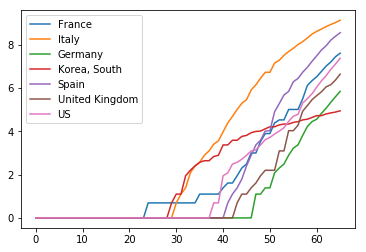

In [134]:
cc = [116,137,120,143,201,223,225]

fig, ax = plt.subplots()
for x in cc:
    Y = np.log( df.iloc[x].values[4:].astype(np.float) + 1)
    ax.plot(np.arange(len(Y)),Y, label=df.iloc[x]["Country/Region"])

#ax.axis('equal')
leg = ax.legend();

# Linear regression

If a quantity is growing/decaying exponentially 
then by taking logs we should get a straignt line....

We can calculate the best fit straight line 
to the data by doing linear regression.



In [69]:
from scipy import stats

In [39]:
cc = [x for x in foyers.index if x != 62]

## for deaths first

In [40]:
window = 15
X = []
for c in cc:
    Y = np.log(df.iloc[c].values[ -window:].astype(np.float))
    vv = stats.linregress(np.arange(window),Y )
    print(df.iloc[c]["Country/Region"].ljust(20), np.exp(vv.slope), vv.intercept)
    X.append(vv.slope)

Belgium              1.4167727563868946 1.2873925411522773
France               1.2891055453575844 4.3687091541065755
Germany              1.3196953980522794 2.29757259838141
Iran                 1.1023371521031626 6.57850326788583
Italy                1.1466553654489402 7.415959985855839
Netherlands          1.3205857974705928 2.8045880800082186
Spain                1.2783194942457663 5.439461536876742
United Kingdom       1.314636042354702 3.2498304148774455
US                   1.305290159193299 3.894380582574639


## and this is confirmed cases

In [41]:
window = 15
Z = []
for c in cc:
    Y = np.log(dfc.iloc[c].values[ -window:].astype(np.float))
    vv = stats.linregress(np.arange(window),Y )
    print(dfc.iloc[c]["Country/Region"].ljust(20), 
           np.exp(vv.slope), vv.intercept) # take exp to get day on day growth
    Z.append(vv.slope)

Belgium              1.196206651090045 6.602360924752273
France               1.166746620033403 8.44817427706321
Germany              1.1946110957527099 8.615335319080774
Iran                 1.0711679447358247 9.465413086296467
Italy                1.1117349098345584 10.054565681998545
Netherlands          1.1812493216215825 6.939924530263344
Spain                1.1923533377032156 8.84174965545959
United Kingdom       1.2223746537380944 6.986207860943692
US                   1.3271927179137974 7.980294837466688


In [130]:
labels = list(dfc.iloc[cc]["Country/Region"])
labels

['France', 'Italy', 'Germany', 'Korea, South', 'Spain', 'United Kingdom']

Text(0.5,0,'confirmed cases growth rate')

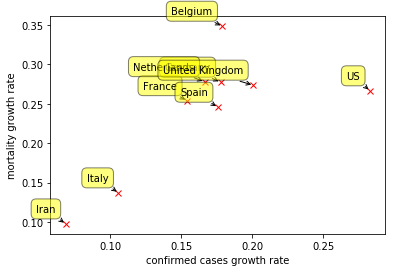

In [43]:
labels = dfc.iloc[cc]["Country/Region"]
for label, x, y in zip(labels, Z,X):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.plot(Z,X,'rx')
plt.ylabel('mortality growth rate')
plt.xlabel('confirmed cases growth rate')

## Calculate rolling averages for some countries for the last 36 days


this was something somebody asked me to do for another problem
but it's a standard way of smoothing data.

In [71]:
df.iloc[cc,1]

116          France
137           Italy
120         Germany
143    Korea, South
201           Spain
Name: Country/Region, dtype: object

In [75]:
start = -36
data = [df.iloc[nn , start:].rolling(5).sum() for nn in cc ]
filtered_data = [ x[x>0].values for x in data]

b France
y Italy
k Germany
g Korea, South
r Spain


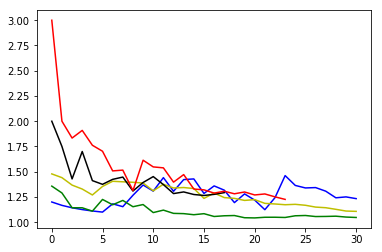

In [76]:
sty = ['r','g','k','y','b']
for x in filtered_data:
    plt.plot( np.arange(len(x)-1), x[1:]/x[:-1], sty.pop())
print('\n'.join(labels))